In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Microsoft_Stock_Price_History.csv to Microsoft_Stock_Price_History.csv


Model Accuracy Comparison:
Logistic Regression Accuracy: 0.540
Random Forest Accuracy: 0.520

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.38      0.32      0.34        19
           1       0.62      0.68      0.65        31

    accuracy                           0.54        50
   macro avg       0.50      0.50      0.49        50
weighted avg       0.53      0.54      0.53        50


Random Forest Report:
              precision    recall  f1-score   support

           0       0.35      0.32      0.33        19
           1       0.61      0.65      0.62        31

    accuracy                           0.52        50
   macro avg       0.48      0.48      0.48        50
weighted avg       0.51      0.52      0.51        50



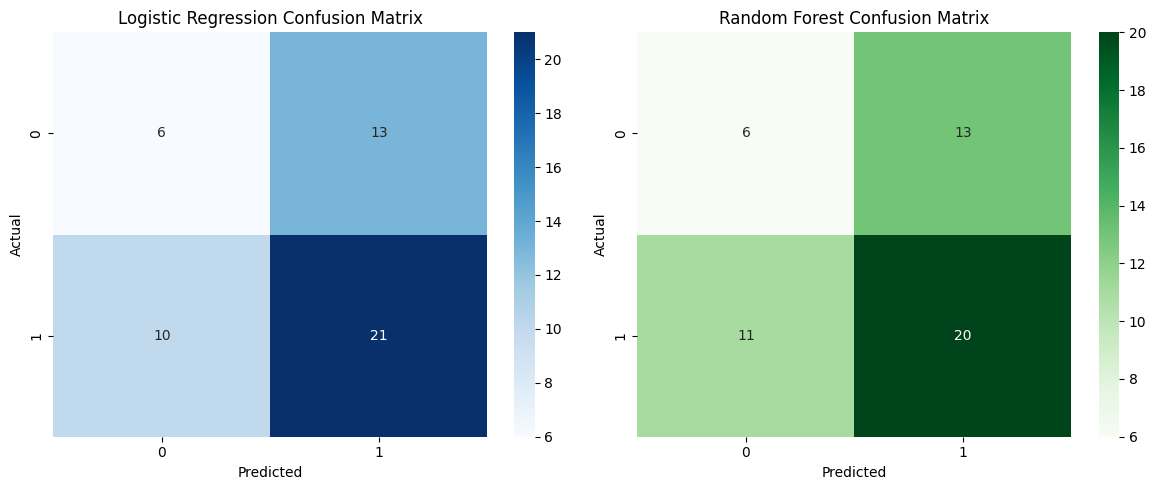

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Microsoft_Stock_Price_History.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Clean 'Vol.' column
def convert_volume(val):
    if isinstance(val, str):
        val = val.replace(',', '').strip()
        if 'M' in val:
            return float(val.replace('M', '')) * 1_000_000
        elif 'K' in val:
            return float(val.replace('K', '')) * 1_000
        elif val == '-':
            return None
        else:
            return float(val)
    return val

df['Vol.'] = df['Vol.'].apply(convert_volume)

# Create new feature: Daily Range
df['Daily Range'] = df['High'] - df['Low']

# Drop missing values
df = df.dropna()

# --- Create Target Variable (1 = Price Up, 0 = Price Down) ---
df['Next_Day_Price'] = df['Price'].shift(-1)
df['Price_Up'] = (df['Next_Day_Price'] > df['Price']).astype(int)

# Drop last row (because shift created NaN)
df = df[:-1]

# Features (X) and Target (y)
X = df[['Open', 'High', 'Low', 'Vol.', 'Daily Range']]
y = df['Price_Up']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# --- Standardize features for Logistic Regression ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model 1: Logistic Regression ---
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# --- Model 2: Random Forest Classifier ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Evaluate Models ---
log_acc = accuracy_score(y_test, y_pred_log)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Model Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {log_acc:.3f}")
print(f"Random Forest Accuracy: {rf_acc:.3f}")

# --- Classification Reports ---
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()
